In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [5]:
train = pd.read_csv("train_preprocessed.csv", sep='\t', index_col=0)
train

,indicator,er-cv,leukocyty,trombocyty,hemoglobin,ast,hematokrit
0,1.0,0.166667,0.401497,0.551966,0.742755,0.111111,0.322113
1,0.0,0.405000,0.525788,0.850466,0.096399,0.467167,0.767291
2,1.0,0.166667,0.812344,0.127427,0.278961,0.111111,0.213721
3,0.0,0.698214,0.787698,0.455711,0.888889,0.422187,0.512109
4,0.0,0.408464,0.944378,0.369594,0.128604,0.111111,0.255717
...,...,...,...,...,...,...,...
7411,0.0,0.166667,0.078640,0.755602,0.278672,0.833333,0.980660
7412,1.0,0.833333,0.341716,0.792409,0.375579,0.833333,0.617682
7413,1.0,0.570789,0.511191,0.041743,0.472727,0.833333,0.130750
7414,1.0,0.336835,0.587366,0.141449,0.701149,0.501854,0.214179


In [8]:
X_train = train[['er-cv','leukocyty','trombocyty','hemoglobin','ast','hematokrit']]
y_train = train[['indicator']]

,er-cv,leukocyty,trombocyty,hemoglobin,ast,hematokrit
0,0.166667,0.401497,0.551966,0.742755,0.111111,0.322113
1,0.405000,0.525788,0.850466,0.096399,0.467167,0.767291
2,0.166667,0.812344,0.127427,0.278961,0.111111,0.213721
3,0.698214,0.787698,0.455711,0.888889,0.422187,0.512109
4,0.408464,0.944378,0.369594,0.128604,0.111111,0.255717
...,...,...,...,...,...,...
7411,0.166667,0.078640,0.755602,0.278672,0.833333,0.980660
7412,0.833333,0.341716,0.792409,0.375579,0.833333,0.617682
7413,0.570789,0.511191,0.041743,0.472727,0.833333,0.130750
7414,0.336835,0.587366,0.141449,0.701149,0.501854,0.214179


In [9]:
test = pd.read_csv("test_preprocessed.csv", sep='\t', index_col=0)
test

,indicator,er-cv,leukocyty,trombocyty,hemoglobin,ast,hematokrit
0,1.0,0.665906,0.100535,0.670131,0.188402,0.774156,0.854971
1,1.0,0.431031,0.292957,0.505078,0.574594,0.519243,0.138992
2,0.0,0.833333,0.927602,0.804264,0.888889,0.888889,0.344746
3,0.0,0.166667,0.494079,0.837628,0.298132,0.111111,0.832973
4,0.0,0.326503,0.585516,0.378796,0.506597,0.460350,0.743430
...,...,...,...,...,...,...,...
2467,0.0,0.596222,0.650872,0.252858,0.504795,0.484935,0.560478
2468,0.0,0.166667,0.338466,0.468159,0.448032,0.247005,0.344596
2469,1.0,0.726931,0.265893,0.137857,0.404205,0.333889,0.602692
2470,0.0,0.166667,0.902223,0.515914,0.573236,0.463605,0.353606


In [15]:
X_test = test[['er-cv','leukocyty','trombocyty','hemoglobin','ast','hematokrit']]
y_test = test[['indicator']]

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [46]:
def predict_tree(i):
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    acc = 1-accuracy_score(y_test, pred)
    rec = 1 - recall_score(y_test, pred)
    prec= 1 - precision_score(y_test, pred)
    print("Accuracy = ",acc," Precision = ",prec," Recall = ",rec)
    return clf

In [53]:
for i in range (2,4):
    help = predict_tree(i)

Accuracy =  0.1694983818770227  Precision =  0.15033475349969572  Recall =  0.10969387755102045
Accuracy =  0.1456310679611651  Precision =  0.11132561132561136  Recall =  0.11926020408163263


In [54]:
from sklearn import tree

[Text(167.4, 190.26, 'X[1] <= 0.381\ngini = 0.458\nsamples = 7416\nvalue = [2627, 4789]'),
 Text(83.7, 135.9, 'X[5] <= 0.926\ngini = 0.188\nsamples = 2868\nvalue = [301, 2567]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 0.352\ngini = 0.122\nsamples = 2412\nvalue = [157, 2255]'),
 Text(20.925, 27.180000000000007, 'gini = 0.1\nsamples = 2223\nvalue = [117, 2106]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.334\nsamples = 189\nvalue = [40, 149]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 0.323\ngini = 0.432\nsamples = 456\nvalue = [144, 312]'),
 Text(104.625, 27.180000000000007, 'gini = 0.369\nsamples = 389\nvalue = [95, 294]'),
 Text(146.475, 27.180000000000007, 'gini = 0.393\nsamples = 67\nvalue = [49, 18]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 0.373\ngini = 0.5\nsamples = 4548\nvalue = [2326, 2222]'),
 Text(209.25, 81.53999999999999, 'X[3] <= 0.818\ngini = 0.317\nsamples = 2070\nvalue = [409, 1661]'),
 Text(188.32500000000002, 27.180000000000007, 'gini 

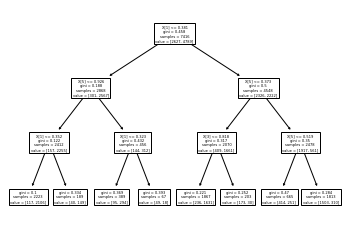

In [55]:
tree.plot_tree(help)